In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#Load the image
image = cv.imread("the_berry_farms_sunflower_field.jpeg")
# try to see why we need to reduse the intensity

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Define Laplacian parameters
sigma = 3
half_width = 3 * sigma
X,Y = np.meshgrid(np.arange(-half_width, half_width+1), np.arange(-half_width, half_width+1))

# Create the Laplacian filter
Laplacian_filter = 1/(2*np.pi*sigma**2) * (X**2 + Y**2 - 2*sigma**2) * np.exp(-(X**2 + Y**2)/(2*sigma**2))

filtered_image = cv.filter2D(gray, -1, Laplacian_filter)

local_maxima = (filtered_image==cv.dilate(filtered_image,np.ones((3))))


 

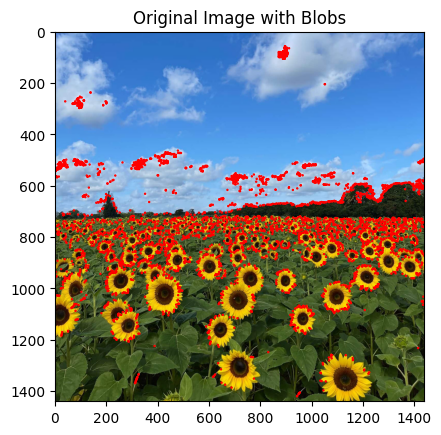

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_blobs(image, threshold):
    # Convert the image to grayscale if it's in color
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image

    height, width = gray.shape
    blobs = []
    
    # Define a neighborhood for each pixel
    neighborhood = np.array([[1, 1, 1],
                              [1, 1, 1],
                              [1, 1, 1]])
    
    # Iterate through the image
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            if gray[y, x] > threshold:
                # Check if the center pixel is greater than the threshold
                local_region = gray[y - 1:y + 2, x - 1:x + 2]
                max_value = local_region.max()
                if gray[y, x] == max_value:
                    blobs.append((x, y))
    
    return blobs

# Load your image from the local directory
image_path = 'the_berry_farms_sunflower_field.jpeg'  # Replace with the path to your image file
image = cv2.imread(image_path)

# Set the threshold for blob detection
threshold_value = 220

# Detect blobs
detected_blobs = detect_blobs(image, threshold_value)

# Visualization
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image with Blobs")
for blob in detected_blobs:
    plt.gca().add_patch(plt.Circle((blob[0], blob[1]), 2, color='r', fill=False))
plt.show()
